## PCA on 3D dataset

In [2]:
import numpy as np
import pandas as pd

N = 1000
# Generating x1, x2 and x3
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2 * x1 + x2

dataset = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3})
print(dataset.head())

         x1        x2        x3
0  1.128538 -0.120526  2.136551
1 -1.770676  0.604250 -2.937102
2  0.557076  0.086412  1.200563
3 -0.072462 -0.868667 -1.013592
4  1.281114 -2.260324  0.301904


using the eigendecomposition of the covariance matrix

In [7]:
vector = np.vstack((x1, x2, x3)).T
covariance_matrix = np.cov(vector, rowvar=False)

# Calculatingthe eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("Eigenvalues", eigenvalues)
print("eigenvectors", eigenvectors)

Eigenvalues [2.59892631e+01 1.82674891e-15 2.04837552e+00]
eigenvectors [[-0.120552   -0.81649658  0.56462425]
 [-0.57096866 -0.40824829 -0.7122697 ]
 [-0.81207266  0.40824829  0.41697881]]


using Singular Value Decomposition (SVD) 

In [10]:
centered_vector = vector - np.mean(vector, axis=0)

# Calculating SVD
U, S, Vt = np.linalg.svd(centered_vector, full_matrices=False)
eigenvalues_svd = S**2 / (N - 1)
eigenvectors_svd = Vt.T
print("Eigenvalues", eigenvalues_svd)
print("eigenvectors", eigenvectors_svd)

Eigenvalues [2.59892631e+01 2.04837552e+00 1.96130211e-31]
eigenvectors [[-0.120552   -0.56462425 -0.81649658]
 [-0.57096866  0.7122697  -0.40824829]
 [-0.81207266 -0.41697881  0.40824829]]


In [11]:
print(np.allclose(eigenvalues_svd, eigenvalues))
print(np.allclose(eigenvectors_svd, eigenvectors))

False
False


"np.allclose" function checks if the results are approximately equal within a certain tolerance. Here I got False so the results are not the same 

In [15]:
#sum of eigenvalues is the variability
variability = np.sum(eigenvalues_svd)

#calculating the percentage of variability explained by each principal component
var_ratio = eigenvalues_svd / variability
cumulative_var = np.cumsum(var_ratio)

#number of principal components to retain at least 99% of the variability
num_components = np.argmax(cumulative_var >= 0.99) + 1
print(var_ratio)
print(cumulative_var)
print(num_components)
reduced_dataset = np.dot(centered_vector, eigenvectors_svd[:, :num_components])

[9.26941939e-01 7.30580613e-02 6.99524714e-33]
[0.92694194 1.         1.        ]
2


In [17]:
selected_eigenvectors = eigenvectors_svd[:, :num_components]
new_data = np.dot(centered_vector, selected_eigenvectors)

IndexError: index 2 is out of bounds for axis 1 with size 2

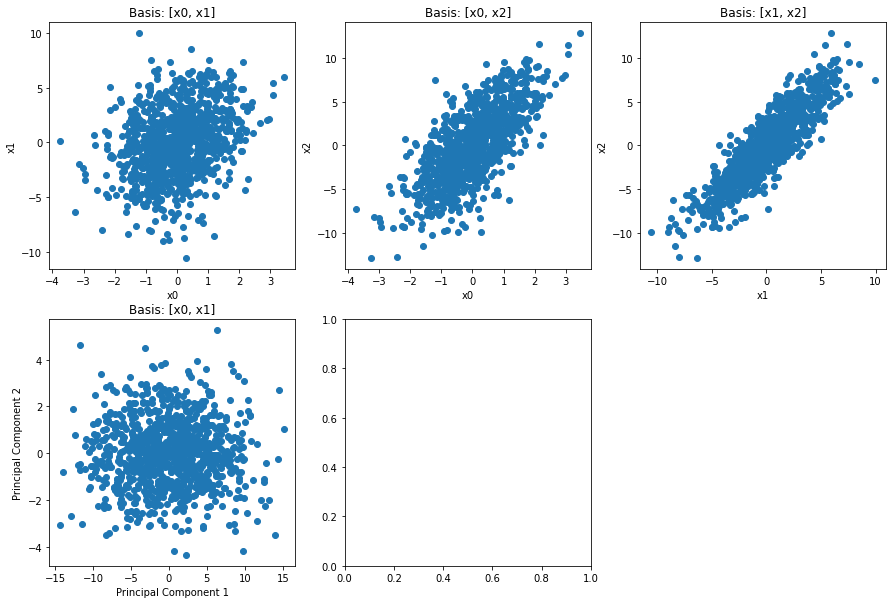

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# basis: [x0, x1]
plt.subplot(2, 3, 1)
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.title('Basis: [x0, x1]')
plt.xlabel('x0')
plt.ylabel('x1')

# basis: [x0, x2]
plt.subplot(2, 3, 2)
plt.scatter(dataset[:, 0], dataset[:, 2])
plt.title('Basis: [x0, x2]')
plt.xlabel('x0')
plt.ylabel('x2')

#basis: [x1, x2]
plt.subplot(2, 3, 3)
plt.scatter(dataset[:, 1], dataset[:, 2])
plt.title('Basis: [x1, x2]')
plt.xlabel('x1')
plt.ylabel('x2')

# Plotting inthe new basis
#basis: [x0, x1]
plt.subplot(2, 3, 4)
plt.scatter(new_data[:, 0], new_data[:, 1])
plt.title('Basis: [x0, x1]')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#basis: [x0, x2]
plt.subplot(2, 3, 5)
plt.scatter(new_data[:, 0], new_data[:, 2])
plt.title('Basis: [x0, x2]')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')

# New basis: [x1, x2]
plt.subplot(2, 3, 6)
plt.scatter(new_data[:, 1], new_data[:, 2])
plt.title('Basis: [x1, x2]')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.show()


## PCA on a nD dataset

IndexError: index 2 is out of bounds for axis 1 with size 2

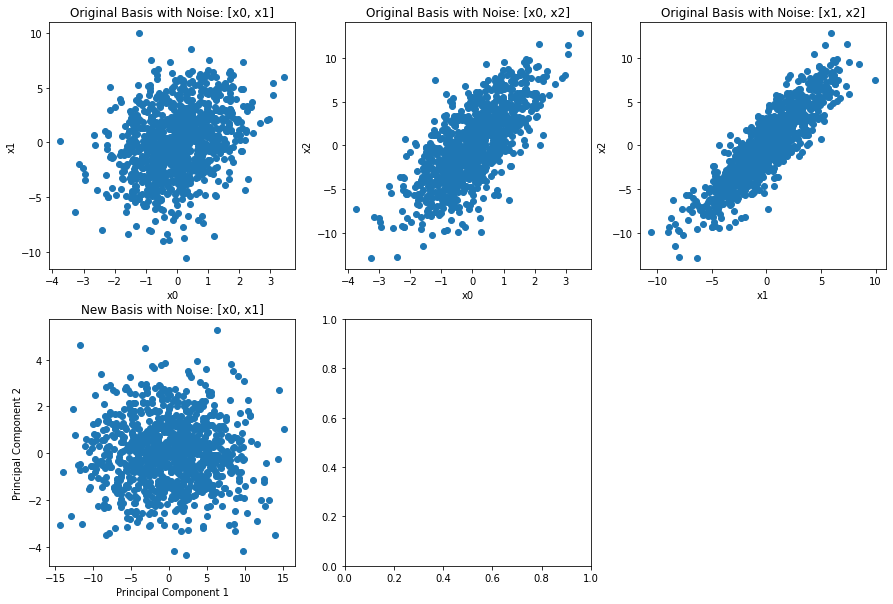

In [23]:
noise = 10
noise_var= np.random.normal(0, 0.05, size=(N, noise))

#addingg noise to the original dataset
noisy_dataset = np.hstack((vector, noise_var))

# applying PCA on our new dataset (with noise)
noisy_center = noisy_dataset - np.mean(noisy_dataset, axis=0)
U_noisy, S_noisy, Vt_noisy = np.linalg.svd(noisy_center, full_matrices=False)
eigenvalues_noise = S_noisy**2 / (N - 1)
eigenvectors_noise = Vt_noisy.T
var_ratio_noise = eigenvalues_noise / np.sum(eigenvalues_noise)
cumulative_var_noise = np.cumsum(var_ratio_noise)

# Number of components needed to retain at least 99% of the total variability
num_componentsnoise = np.argmax(cumulative_var_noise >= 0.99) + 1

# Redefine the data according to the new basis from PCA
selected_eigenvectors_noise = eigenvectors_noise[:, :num_componentsnoise]
new_data_noise = np.dot(noisy_center, selected_eigenvectors_noise)

# Visualize the results
plt.figure(figsize=(15, 10))

# Scatter plots in the original basis with noise
plt.subplot(2, 3, 1)
plt.scatter(noisy_dataset[:, 0], noisy_dataset[:, 1])
plt.title('Original Basis with Noise: [x0, x1]')
plt.xlabel('x0')
plt.ylabel('x1')

plt.subplot(2, 3, 2)
plt.scatter(noisy_dataset[:, 0], noisy_dataset[:, 2])
plt.title('Original Basis with Noise: [x0, x2]')
plt.xlabel('x0')
plt.ylabel('x2')

plt.subplot(2, 3, 3)
plt.scatter(noisy_dataset[:, 1], noisy_dataset[:, 2])
plt.title('Original Basis with Noise: [x1, x2]')
plt.xlabel('x1')
plt.ylabel('x2')

# Scatter plots in the new basis with noise
plt.subplot(2, 3, 4)
plt.scatter(new_data_noise[:, 0], new_data_noise[:, 1])
plt.title('New Basis with Noise: [x0, x1]')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(2, 3, 5)
plt.scatter(new_data_noise[:, 0], new_data_noise[:, 2])
plt.title('New Basis with Noise: [x0, x2]')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')

plt.subplot(2, 3, 6)
plt.scatter(new_data_noise[:, 1], new_data_noise[:, 2])
plt.title('New Basis with Noise: [x1, x2]')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')

plt.show()

## Optional: PCA on the MAGIC dataset